In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix, roc_curve

In [2]:
# Importar dataset
train = pd.read_csv("projeto4_telecom_treino.csv")
test = pd.read_csv("projeto4_telecom_teste.csv")

In [3]:
# Visualizar estrutura do dataset
train.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [4]:
# Visualizar todas os nomes das colunas e entender a natureza de cada coluna
train.columns

Index(['Unnamed: 0', 'state', 'account_length', 'area_code',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [5]:
# Extrair o codigo sem o texto da coluna area_code
train["area_code"] = train.area_code.str.extract(r'(?P<area_code>[(\d)]{3})')

In [6]:
# Ver summary das variáveis númericas do dataset
""" 
Existem 16 variáveis numéricas no dataset 
- account_length: quanto tempo o cliente tem a conta? média de 101 meses?
- number_vmail_messages: média de 8 mensagens por dia 
- total_day_minutes: média de 179 minutos de ligação por dia
- total_day_calls: média de 100 ligações por dia
- total_day_charge: média de 30 valores cobrado por dia
- total_eve_minutos: média de 200 minutos de ligações a tarde
- total_eve_calls: média 100 ligações a tarde
- total_eve_charge: média de 17 valores cobrado a tarde
- total_night_minutos: média de 200 minutos de ligações a noite
- total_night_calls: média 100 ligações a noite
- total_night_charge: média de 9 valores cobrado a noite
- total_intl_minutos: média de 10 minutos de ligações internacional
- total_intl_calls: média 4.4 ligações internacional
- total_intl_charge: média de 2.7 valores cobrado internacional
- number_customer_service_calls: média de 1.5 ligação ao serviço de atendimento ao cliente 
"""
train.describe()

,Unnamed: 0,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1667.00000,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,962.29855,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,834.00000,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,1667.00000,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,2500.00000,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,3333.00000,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
# Observar quantas variáveis são categóricas ou numéricas
# 16 variáveis numéricas e 5 categóricas
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     3333 non-null   int64  
 1   state                          3333 non-null   object 
 2   account_length                 3333 non-null   int64  
 3   area_code                      3333 non-null   object 
 4   international_plan             3333 non-null   object 
 5   voice_mail_plan                3333 non-null   object 
 6   number_vmail_messages          3333 non-null   int64  
 7   total_day_minutes              3333 non-null   float64
 8   total_day_calls                3333 non-null   int64  
 9   total_day_charge               3333 non-null   float64
 10  total_eve_minutes              3333 non-null   float64
 11  total_eve_calls                3333 non-null   int64  
 12  total_eve_charge               3333 non-null   f

In [8]:
# Agrupar os tipos de variáveis por grupo
train.columns.to_series().groupby(train.dtypes).groups

{int64: ['Unnamed: 0', 'account_length', 'number_vmail_messages', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls', 'number_customer_service_calls'], float64: ['total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge', 'total_night_minutes', 'total_night_charge', 'total_intl_minutes', 'total_intl_charge'], object: ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']}

In [9]:
# Checar se existem valores NA
train.isna().any()

Unnamed: 0                       False
state                            False
account_length                   False
area_code                        False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
churn                            False
dtype: bool

In [10]:
# Checar se existem valores null
train.isnull().sum()

Unnamed: 0                       0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [26]:
# Listas das colunas categóricas e numéricas
cat = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']
num = ['Unnamed: 0', 'account_length', 'number_vmail_messages', 'total_day_calls', 
    'total_eve_calls', 'total_night_calls', 'total_intl_calls', 'number_customer_service_calls', 
        'total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge', 
            'total_night_minutes', 'total_night_charge', 'total_intl_minutes', 'total_intl_charge']

In [12]:
# Observar quantos valores individuais cada variável categórica possui
for i in cat:
    print(i, train[i].nunique())

state 51
area_code 3
international_plan 2
voice_mail_plan 2
churn 2


In [13]:
# Observar a distribuição dos valores categóricos
# Pular os estados por enquanto
"""
- Maioria dos area_code é de 415
- Maioria não possui plano internacional
- Maiora não possui plano de voice mail
- Churn está desbalanceado!! 
"""
for i in cat:
    if i == 'state':
        pass
    else:
        print(f"{i} \n {train[i].value_counts()}")

area_code 
 415    1655
510     840
408     838
Name: area_code, dtype: int64
international_plan 
 no     3010
yes     323
Name: international_plan, dtype: int64
voice_mail_plan 
 no     2411
yes     922
Name: voice_mail_plan, dtype: int64
churn 
 no     2850
yes     483
Name: churn, dtype: int64


In [14]:
# Transformar as variáveis cat com label 0 ou 1
# Apenas as variáveis com 2 categorias
# TODO Transformar as variáveis com > 2 categorias
le = LabelEncoder()
le_count = 0
for col in cat:
    if len(list(train[col].unique())) <= 2:
        le.fit(train[col])
        train[col] = le.transform(train[col])
        le_count += 1
print('{} colunas foram transformadas.'.format(le_count))

3 colunas foram transformadas.


In [15]:
# Observar as transformações realizadas
train[cat]

,state,area_code,international_plan,voice_mail_plan,churn
0,KS,415,0,1,0
1,OH,415,0,1,0
2,NJ,415,0,0,0
3,OH,408,1,0,0
4,OK,415,1,0,0
...,...,...,...,...,...
3328,AZ,415,0,1,0
3329,WV,415,0,0,0
3330,RI,510,0,0,0
3331,CT,510,1,0,0


array([[<AxesSubplot:title={'center':'account_length'}>,
        <AxesSubplot:title={'center':'international_plan'}>,
        <AxesSubplot:title={'center':'voice_mail_plan'}>,
        <AxesSubplot:title={'center':'number_vmail_messages'}>],
       [<AxesSubplot:title={'center':'total_day_minutes'}>,
        <AxesSubplot:title={'center':'total_day_calls'}>,
        <AxesSubplot:title={'center':'total_day_charge'}>,
        <AxesSubplot:title={'center':'total_eve_minutes'}>],
       [<AxesSubplot:title={'center':'total_eve_calls'}>,
        <AxesSubplot:title={'center':'total_eve_charge'}>,
        <AxesSubplot:title={'center':'total_night_minutes'}>,
        <AxesSubplot:title={'center':'total_night_calls'}>],
       [<AxesSubplot:title={'center':'total_night_charge'}>,
        <AxesSubplot:title={'center':'total_intl_minutes'}>,
        <AxesSubplot:title={'center':'total_intl_calls'}>,
        <AxesSubplot:title={'center':'total_intl_charge'}>],
       [<AxesSubplot:title={'center':'n

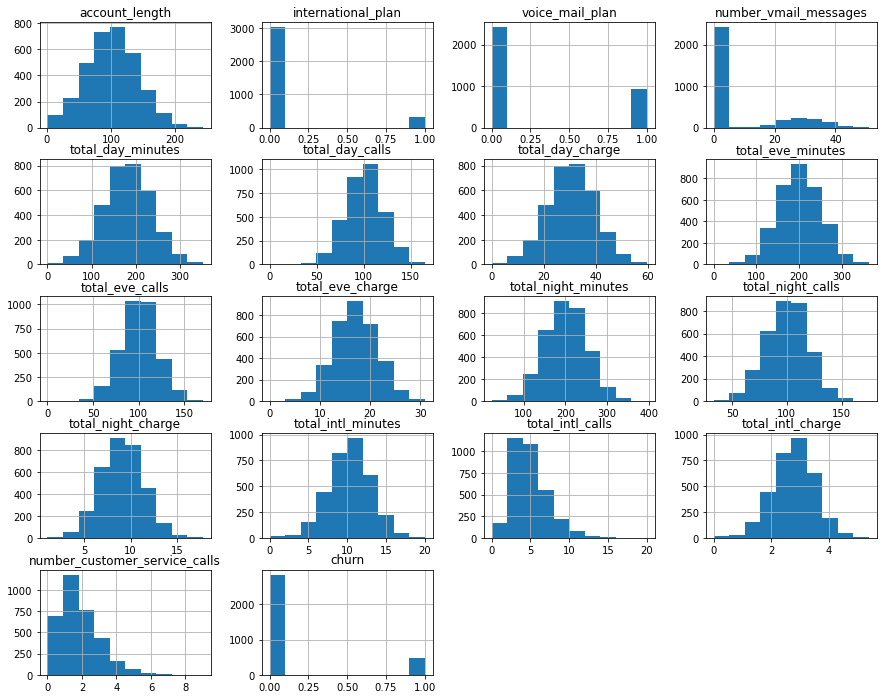

In [16]:
# Visualizar os histogramas das variáveis numéricas 
# Incluindo as transformadas
# Não avaliar a coluna de id
# Total de 18 sem o unamed
train.iloc[:, 1:].hist(figsize=(15, 12))

<AxesSubplot:xlabel='account_length', ylabel='Density'>

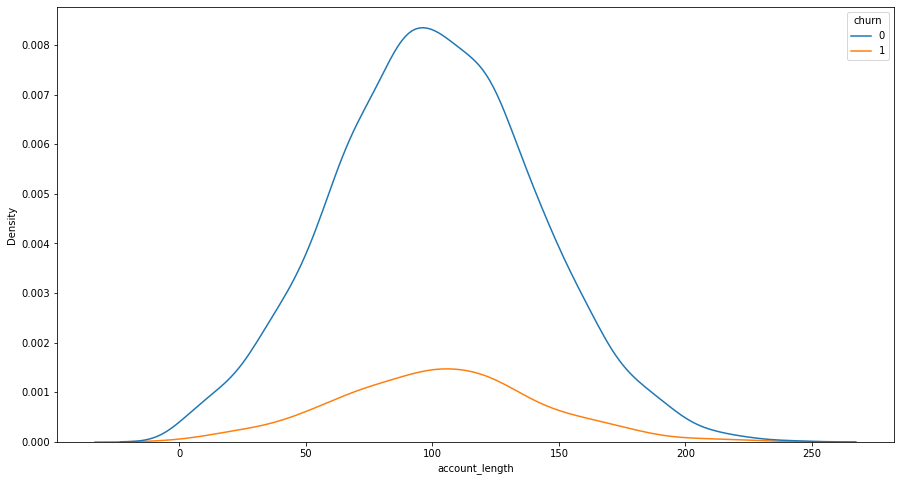

In [17]:
"""
Não existe relação em ter mais ou menos tempo de conta e churn,
a as pessoas com média de tempo de plano são as que mais cancelam
"""
plt.figure(figsize=(15,8))
sns.kdeplot(x = "account_length", hue = "churn", data = train)

<AxesSubplot:xlabel='account_length', ylabel='total_day_calls'>

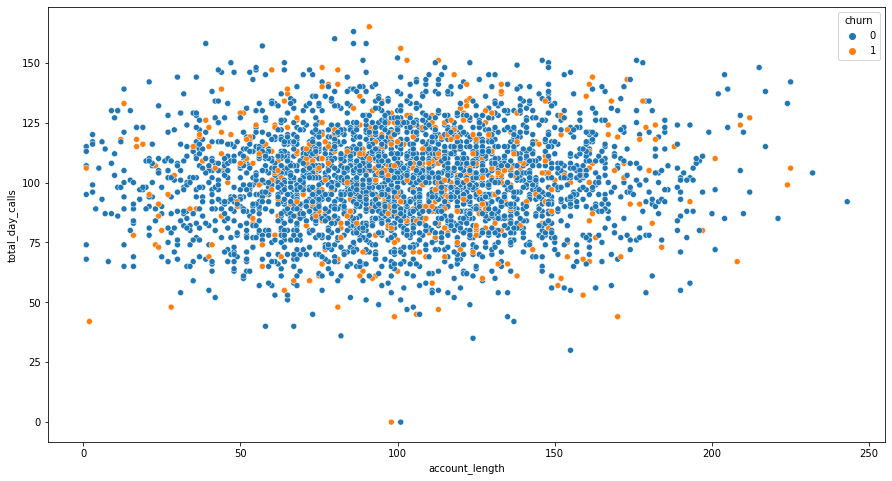

In [18]:
# Avaliar o tempo de conta, total de ligações e o churn
plt.figure(figsize=(15,8))
sns.scatterplot(x = "account_length", y = "total_day_calls", hue = "churn", data = train)

<AxesSubplot:xlabel='international_plan', ylabel='count'>

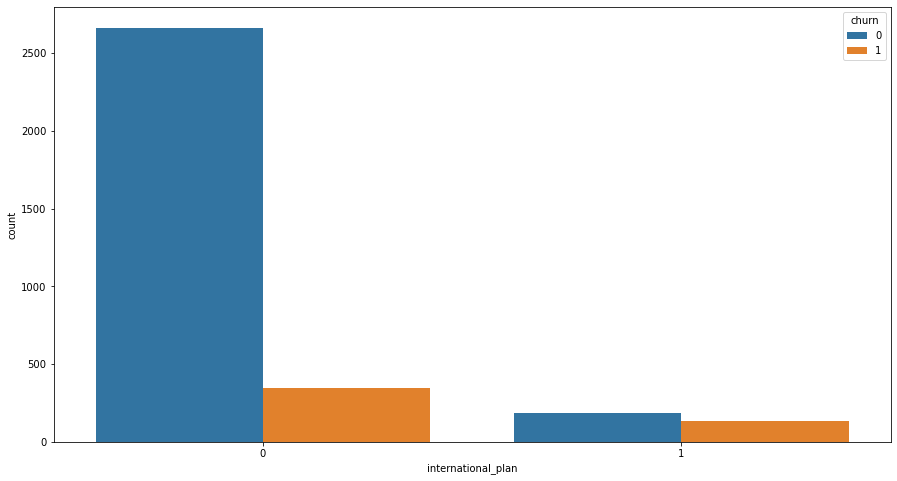

In [19]:
""" 
Pessoas que possuem plano internacional cancelam mais o plano
"""
plt.figure(figsize=(15,8))
sns.countplot(x = "international_plan", hue = "churn", data = train)

<AxesSubplot:xlabel='voice_mail_plan', ylabel='count'>

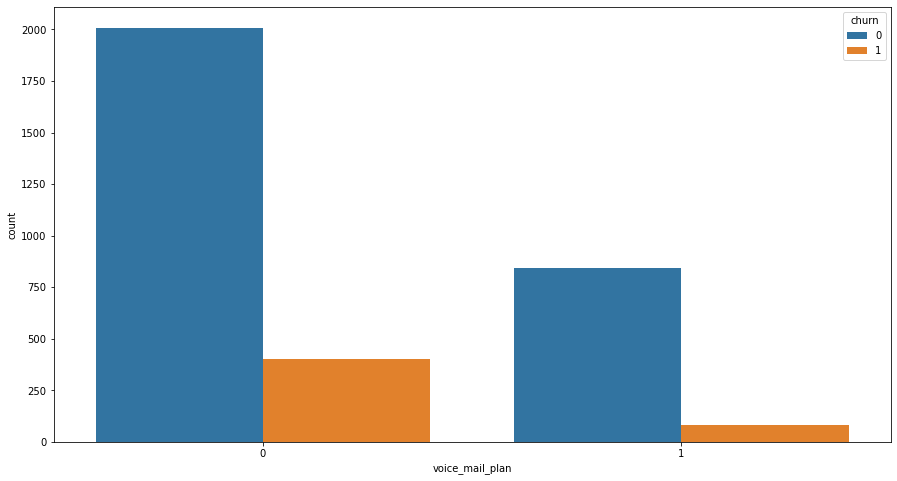

In [20]:
""" 
Pessoas que não possuem plano de voice mail cancelam mais o plano
"""
plt.figure(figsize=(15,8))
sns.countplot(x = "voice_mail_plan", hue = "churn", data = train)

<AxesSubplot:xlabel='number_vmail_messages', ylabel='Density'>

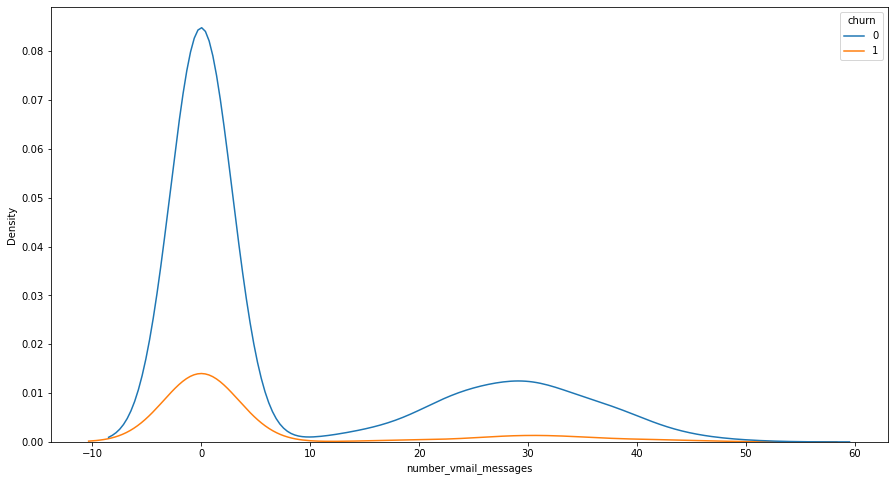

In [22]:
# Avaliar número de mensagem e churn de clientes
plt.figure(figsize=(15,8))
sns.kdeplot(x = "number_vmail_messages", hue = "churn", data = train)

<AxesSubplot:xlabel='state', ylabel='count'>

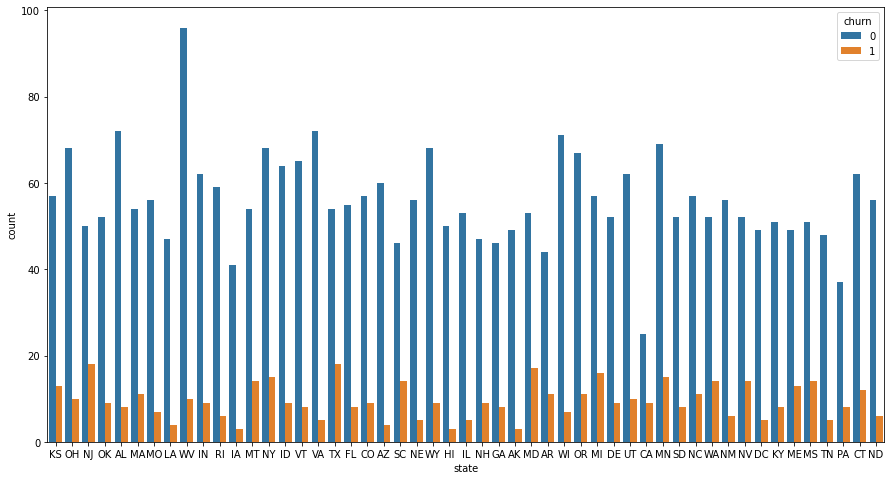

In [23]:
# Avaliar o churn de clientes nos estados
plt.figure(figsize=(15,8))
sns.countplot(x = "state", hue = "churn", data = train)

In [24]:
# Observar as correlações entre as variáveis numéricas
"""
Maior correlações de ~ 0.25 
"""
num2 = [i for i in train.columns if train[i].dtypes == 'int64' or train[i].dtypes == 'float64']
num2 = num2[1:]
correlations = train[num2].corrwith(train.churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)
print('Correlações Mais Positivas: \n', positive_correlations)
print('\nCorrelações Mais Negativas: \n', negative_correlations)

Correlações Mais Positivas: 
 international_plan               0.259852
number_customer_service_calls    0.208750
total_day_minutes                0.205151
total_day_charge                 0.205151
total_eve_minutes                0.092796
total_eve_charge                 0.092786
total_intl_charge                0.068259
total_intl_minutes               0.068239
total_night_charge               0.035496
total_night_minutes              0.035493
total_day_calls                  0.018459
account_length                   0.016541
total_eve_calls                  0.009233
total_night_calls                0.006141
dtype: float64

Correlações Mais Negativas: 
 total_intl_calls        -0.052844
number_vmail_messages   -0.089728
voice_mail_plan         -0.102148
dtype: float64


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

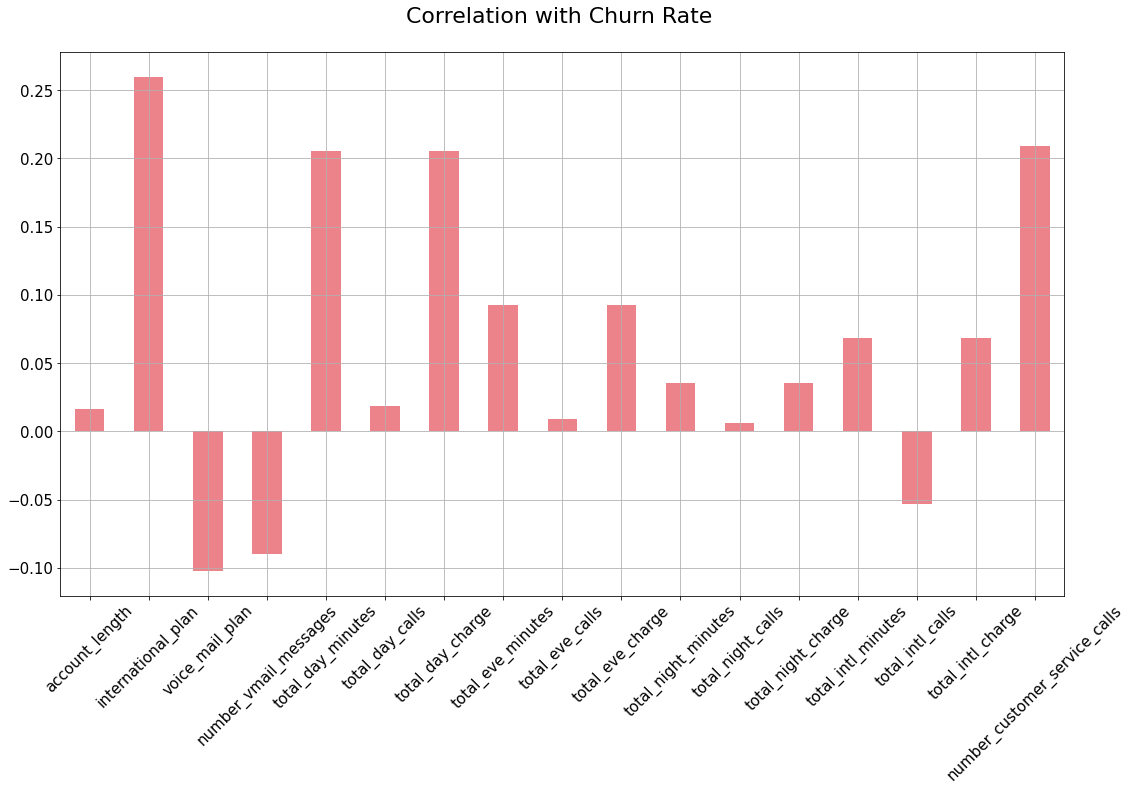

In [25]:
# Plotar o gráfico das correlações
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

/tmp/ipykernel_25535/3077431088.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

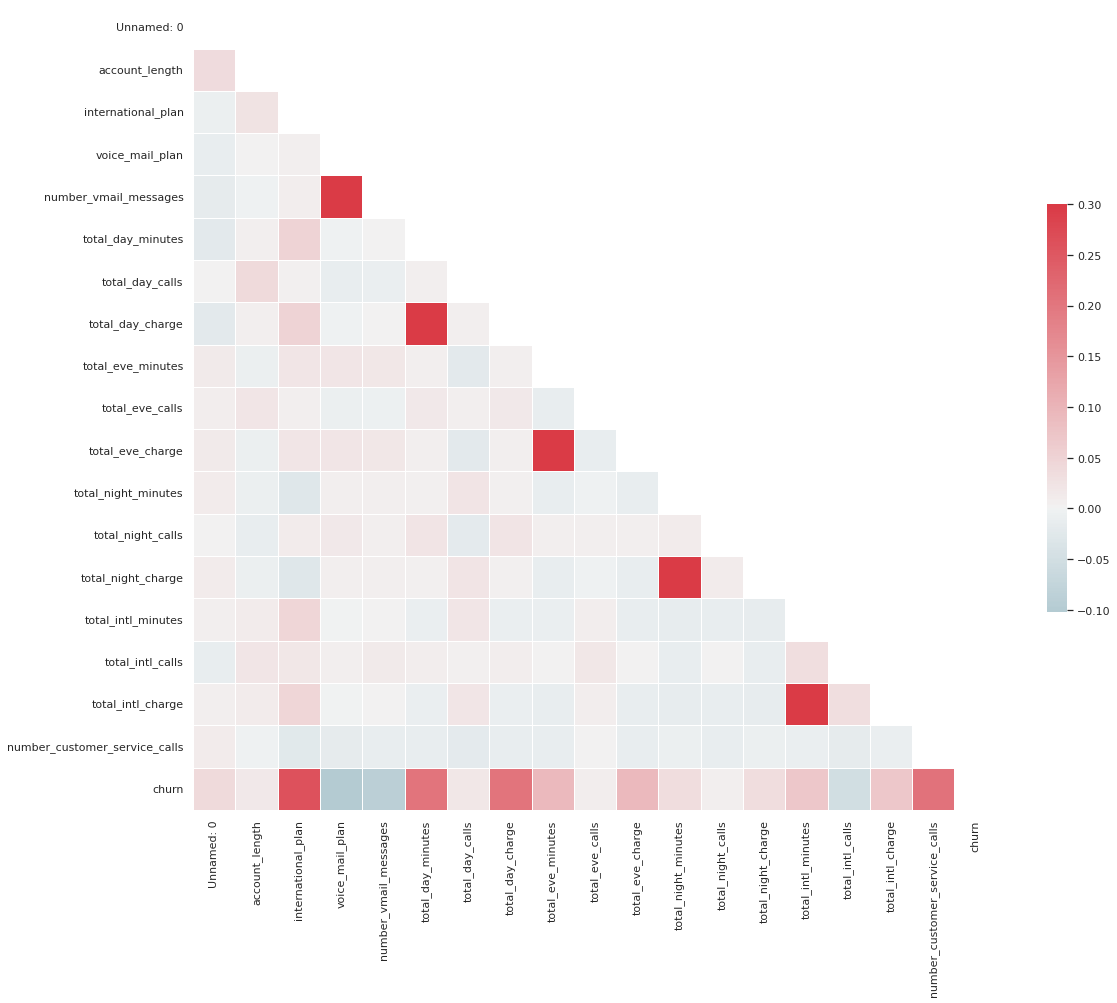

In [27]:
# Correlação de todas as variáveis independentes 
sns.set(style="white")
corr = train.corr()

# Criar uma máscara para deixar a parte superior da correlação em branco
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Criando figura
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Criando heatmap com a máscara
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
# Calcular multicolinariedade com VIF
"""
Observa-se que alguns valores estão muito altos, vaos analisar por plot os pares total minutes e charge
"""

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variaveis"] = X.columns
    vif["VIF"] = ['{:.2f}'.format(variance_inflation_factor(X.values, i)) for i in range(X.shape[1])]
    return(vif)

vif = calc_vif(train[num2])
vif

,variaveis,VIF
0,account_length,7.20
1,international_plan,1.20
2,voice_mail_plan,16.51
3,number_vmail_messages,16.08
4,total_day_minutes,124621431.24
5,total_day_calls,21.81
6,total_day_charge,124625797.15
7,total_eve_minutes,37390302.52
8,total_eve_calls,22.04
9,total_eve_charge,37391237.23


<AxesSubplot:xlabel='total_day_minutes', ylabel='total_day_charge'>

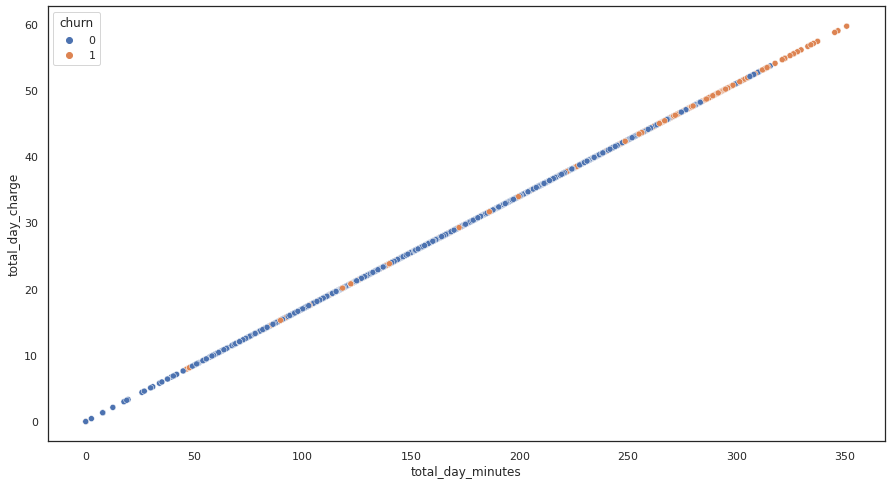

In [29]:
# Avaliar correlação entre as principais observadas 
""" 
Correlação perfeita
"""
plt.figure(figsize=(15,8))
sns.scatterplot(x = "total_day_minutes", y = "total_day_charge", hue = "churn", data = train)

<AxesSubplot:xlabel='total_eve_minutes', ylabel='total_eve_charge'>

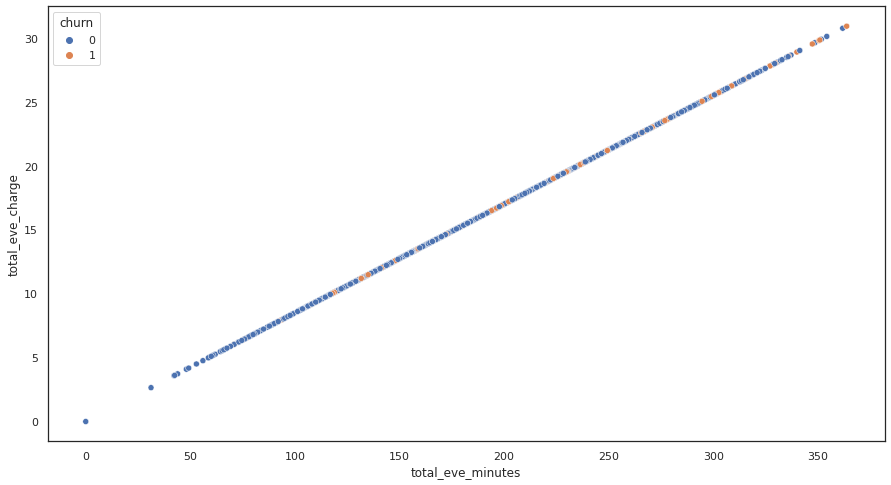

In [30]:
# Avaliar correlação entre as principais observadas 
""" 
Correlação perfeita
"""
plt.figure(figsize=(15,8))
sns.scatterplot(x = "total_eve_minutes", y = "total_eve_charge", hue = "churn", data = train)

<AxesSubplot:xlabel='total_night_minutes', ylabel='total_night_charge'>

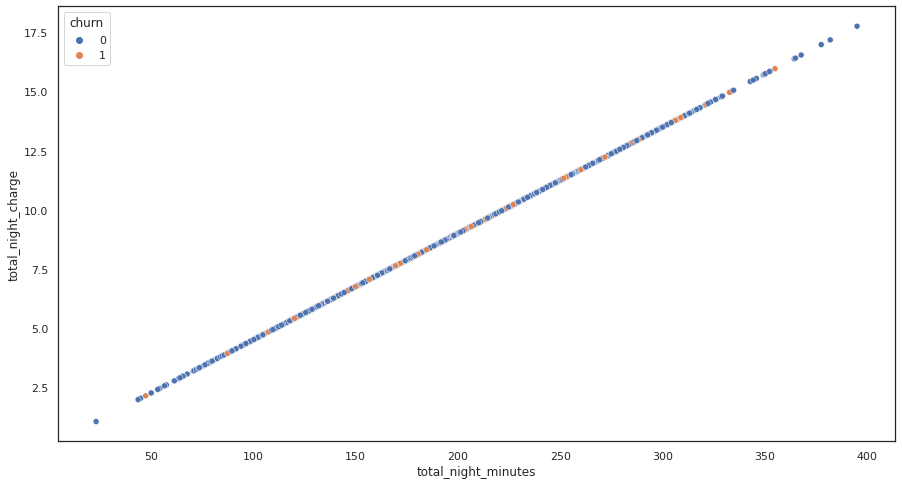

In [31]:
# Avaliar correlação entre as principais observadas 
""" 
Correlação perfeita
"""
plt.figure(figsize=(15,8))
sns.scatterplot(x = "total_night_minutes", y = "total_night_charge", hue = "churn", data = train)

<AxesSubplot:xlabel='total_intl_minutes', ylabel='total_intl_charge'>

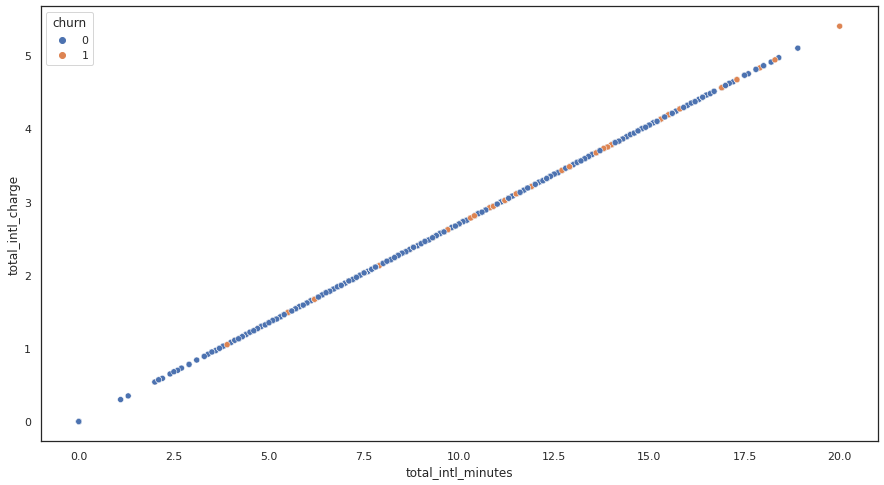

In [32]:
# Avaliar correlação entre as principais observadas 
""" 
Correlação perfeita
"""
plt.figure(figsize=(15,8))
sns.scatterplot(x = "total_intl_minutes", y = "total_intl_charge", hue = "churn", data = train)

In [33]:
# Avaliar VIF apoós retirada das variáveis com multicolinearidade e comparar com anterior
""" 
VIF acima de 10 indica multicolinearidade, mas para o primeiro modelo manteremos as maiores de 20
"""
num3 = [vif["variaveis"][i] for i in vif.index if vif["VIF"].astype("float64")[i] <= 25]
ind = [i for i in vif.index if vif["VIF"].astype("float64")[i] <= 25]
vif2 = calc_vif(train[num3])
vif2

,variaveis,VIF
0,account_length,7.03
1,international_plan,1.20
2,voice_mail_plan,16.49
3,number_vmail_messages,16.06
4,total_day_calls,18.71
5,total_eve_calls,19.20
6,total_night_calls,18.86
7,total_intl_calls,4.20
8,number_customer_service_calls,2.49
9,churn,1.34


In [34]:
# Transformar as variáveis categóricas com mais de 2 var em dummies
# Salvar o prórpio indice do dataset

id = train["Unnamed: 0"]

# Apagar o próprio indice do dataset
train = train.drop(columns="Unnamed: 0")

# Transformar em dummies
df = pd.get_dummies(train)

# Contater o df com o id próprio
df = pd.concat([id, df], axis = 1)
df

,Unnamed: 0,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_408,area_code_415,area_code_510
0,1,128,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,1,0
1,2,107,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,1,0
2,3,137,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,1,0
3,4,84,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,1,0,0
4,5,75,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3329,192,0,1,36,156.2,77,26.55,215.5,126,...,0,0,0,0,0,0,0,0,1,0
3329,3330,68,0,0,0,231.1,57,39.29,153.4,55,...,0,0,0,0,0,1,0,0,1,0
3330,3331,28,0,0,0,180.8,109,30.74,288.8,58,...,0,0,0,0,0,0,0,0,0,1
3331,3332,184,1,0,0,213.8,105,36.35,159.6,84,...,0,0,0,0,0,0,0,0,0,1


In [35]:
# Separar o dataset em X (Variáveis independentes) e em y (variável dependente)

y = df.churn.copy()
X = df.drop(columns="churn").copy()

In [36]:
# Separar o data set em treino e teste
"""
Importante stratificar pelo y pois está desbalanceado
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2666, 72), (667, 72), (2666,), (667,))

In [37]:
# Retirar o id prórpio do dataset
train_identity = X_train['Unnamed: 0'].copy()
X_train = X_train.drop(columns = ['Unnamed: 0'])

test_identity = X_test['Unnamed: 0'].copy()
X_test = X_test.drop(columns = ['Unnamed: 0'])

In [38]:
# Normalizar o dataset
sc_X = StandardScaler()

X_train = pd.DataFrame(sc_X.fit_transform(X_train), columns = X_train.columns, index = X_train.index)

X_test = pd.DataFrame(sc_X.transform(X_test), columns = X_test.columns, index = X_test.index)

In [47]:
# Aproveitar e avaliar 7 diferentes modelos para primeira iteração
"""
Importante para ter noção do resultado inicial dos modelos e poder aprimorar os modelos na sequência
"""

models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))

# Criar lista de resultados para comparação dos modelos
acc_results = []
auc_results = []
names = []

# Criar uma tabela para inserir os resultados (das listas acima) e avaliar as performances
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0

# Avaliar cada modelo com cross-validation:
for name, model in models:
    kfold = KFold(n_splits=10)

    # accuracy scoring:
    cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

    # roc_auc scoring:
    cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')

    # append results
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,\
                            round(cv_auc_results.mean()*100, 2),\
                            round(cv_auc_results.std()*100, 2),\
                            round(cv_acc_results.mean()*100, 2),\
                            round(cv_acc_results.std()*100, 2)\
                            ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
6,Random Forest,91.57,2.45,93.13,1.98
2,Kernel SVM,84.65,1.75,87.02,2.86
5,Decision Tree Classifier,84.15,3.50,92.05,2.25
0,Logistic Regression,80.31,1.99,75.17,2.67
1,SVC,74.94,2.75,85.56,2.47
3,KNN,66.42,4.05,85.60,2.46
4,Gaussian NB,62.23,4.19,54.65,5.98


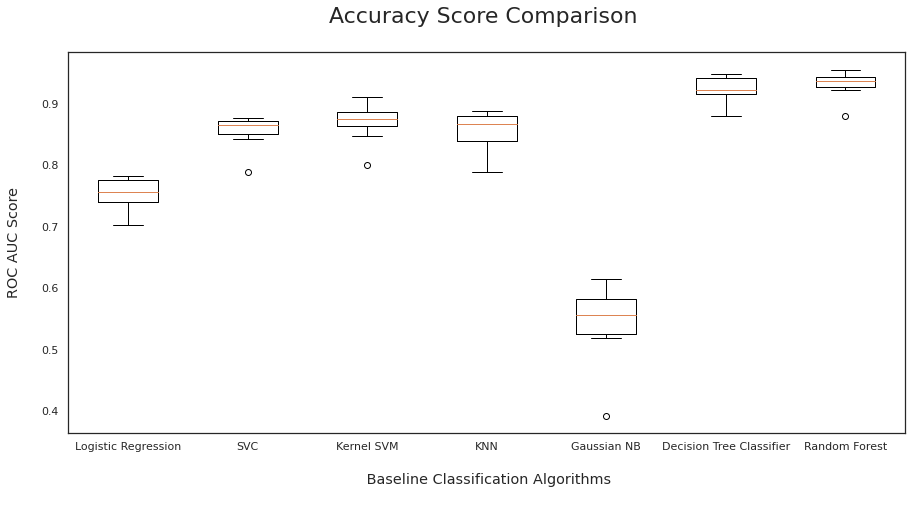

In [42]:
# Avaliar os modelos pela Acurácia
"""
Random Forest para ser o melhor modelo 
"""
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.ylabel('ROC AUC Score\n', horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n', horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

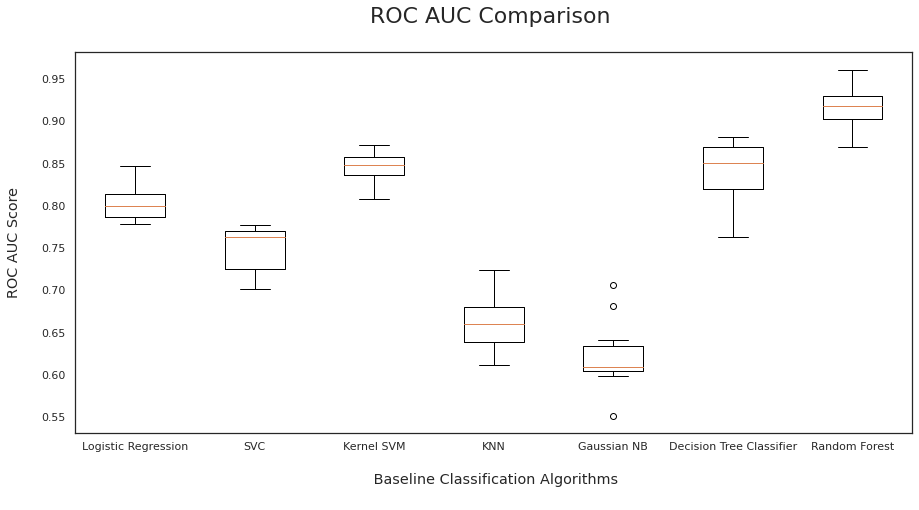

In [41]:
# AVAliar os modelos pela área sob a curva ROC
"""
Random Forest para ser o melhor modelo 
"""
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.ylabel('ROC AUC Score\n', horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n', horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

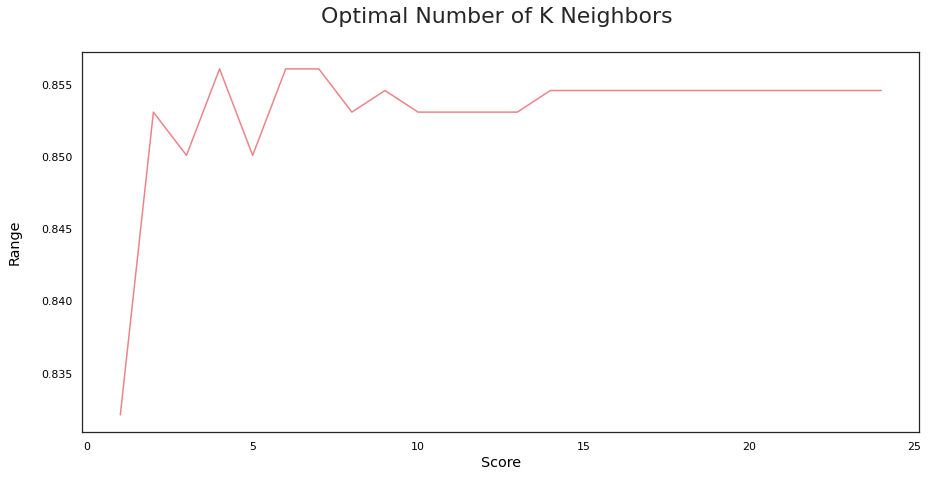

In [43]:
# Avaliar o melhor numéro de K vizinhos
"""
Com k = 5 teremos o melhor score de 0.85
"""
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
#set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center", color = "#000000", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center", color = "#000000", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n', horizontalalignment="center", fontstyle = "normal",  fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center", color = "#000000")
plt.yticks(rotation=0, horizontalalignment="right", color = "#000000")
plt.show()

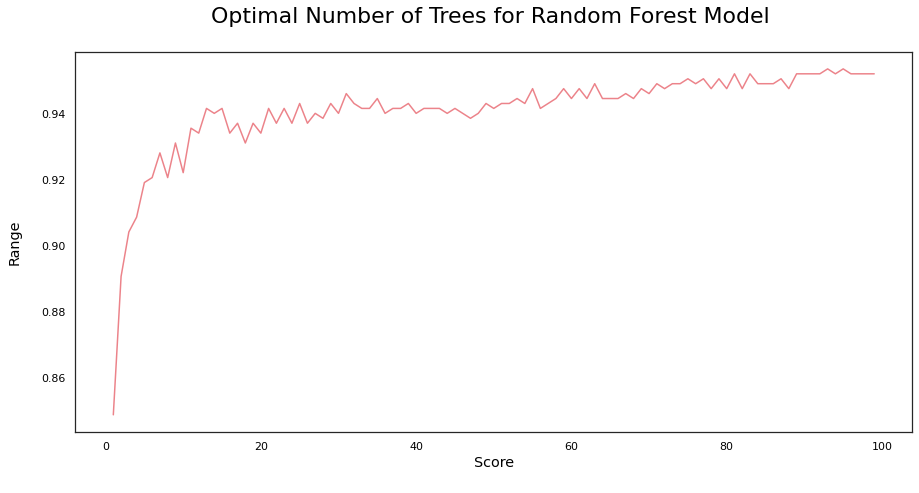

In [44]:
# Identificar o melhor número de tree para o RFM
"""
Entre 40 e 60 teremos o maior score
"""
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))

fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif", color = "#000000")
plt.xlabel('Score\n',horizontalalignment="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif", color = "#000000")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif", color = "#000000")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center", color = "#000000")
plt.yticks(rotation=0, horizontalalignment="right", color = "#000000")
plt.show()

In [72]:
# Aprimorando o modelo com Regressão Logística
classifier = LogisticRegression(max_iter=10000, n_jobs=1, solver='liblinear', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.872564   0.642857  0.278351  0.388489  0.313953


In [73]:
# Aprimorando o modelo com SVM Linear
classifier = SVC(kernel = 'linear', class_weight='balanced', max_iter=1000, random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.872564   0.642857  0.278351  0.388489  0.313953
1         SVM (Linear)  0.872564   0.642857  0.278351  0.388489  0.313953


/home/leandro/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [74]:
# Aprimorando o modelo com KNN
classifier = KNeighborsClassifier(n_neighbors = 5, algorithm='brute', metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred  = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.872564   0.642857  0.278351  0.388489  0.313953
1          SVM (Linear)  0.872564   0.642857  0.278351  0.388489  0.313953
2  K-Nearest Neighbours  0.850075   0.384615  0.051546  0.090909  0.062344


In [75]:
# Aprimorando o modelo com SVM
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Kernel SVM', acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
3            Kernel SVM  0.871064   0.923077  0.123711  0.218182  0.149626
0   Logistic Regression  0.872564   0.642857  0.278351  0.388489  0.313953
1          SVM (Linear)  0.872564   0.642857  0.278351  0.388489  0.313953
2  K-Nearest Neighbours  0.850075   0.384615  0.051546  0.090909  0.062344


In [76]:
# Aprimorando o modelo com Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Naive Bayes', acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision','Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0            Kernel SVM  0.871064   0.923077  0.123711  0.218182  0.149626
1   Logistic Regression  0.872564   0.642857  0.278351  0.388489  0.313953
2          SVM (Linear)  0.872564   0.642857  0.278351  0.388489  0.313953
3  K-Nearest Neighbours  0.850075   0.384615  0.051546  0.090909  0.062344
4           Naive Bayes  0.622189   0.214022  0.597938  0.315217  0.440061


In [77]:
# Aprimorando o modelo com Decision Tree
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0            Kernel SVM  0.871064   0.923077  0.123711  0.218182  0.149626
5         Decision Tree  0.928036   0.742574  0.773196  0.757576  0.766871
1   Logistic Regression  0.872564   0.642857  0.278351  0.388489  0.313953
2          SVM (Linear)  0.872564   0.642857  0.278351  0.388489  0.313953
3  K-Nearest Neighbours  0.850075   0.384615  0.051546  0.090909  0.062344
4           Naive Bayes  0.622189   0.214022  0.597938  0.315217  0.440061


In [78]:
# Aprimorando o modelo com Random Forest
    
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
6         Random Forest  0.937031   0.982456  0.577320  0.727273  0.629213
0            Kernel SVM  0.871064   0.923077  0.123711  0.218182  0.149626
1         Decision Tree  0.928036   0.742574  0.773196  0.757576  0.766871
2   Logistic Regression  0.872564   0.642857  0.278351  0.388489  0.313953
3          SVM (Linear)  0.872564   0.642857  0.278351  0.388489  0.313953
4  K-Nearest Neighbours  0.850075   0.384615  0.051546  0.090909  0.062344
5           Naive Bayes  0.622189   0.214022  0.597938  0.315217  0.440061


In [79]:
# Vamos escolher a Regressão logística devido ao exercício
"""
Entretanto o melhor modelo e o que deveria ser escolhido é o Random Forest,
Devido ao maior número de predições positivas enquanto minimizou os erros
Com os falsos negativos
"""
classifier = LogisticRegression(max_iter=10000, n_jobs=1, penalty='l1', solver='liblinear', random_state = 0)
classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = classifier.predict(X_test)
#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.872564   0.642857  0.278351  0.388489  0.313953


In [80]:
# Avaliando o modelo final com cross validation e a acurácia e o desvio padrão
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression Classifier Accuracy: 0.86 (+/- 0.02)


Text(0.5, 7.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

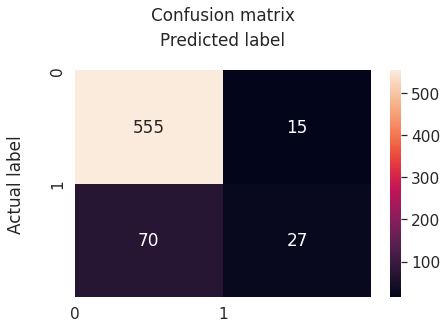

In [82]:
# Avaliar a matriz de confusão do modelo
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

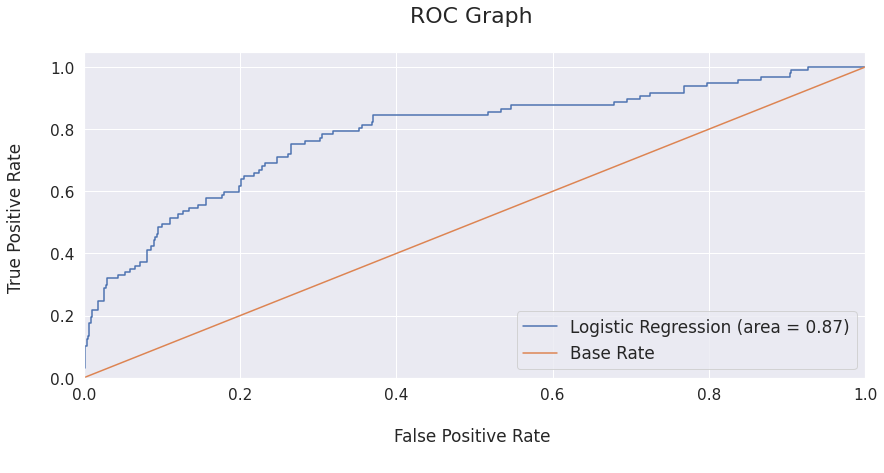

In [83]:
# Avaliar a curva ROC do modelo
classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))
# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [84]:
# Avaliar as variáveis mais importantes para o modelo
feature_importances = pd.concat([pd.DataFrame(train.columns, columns = ["features"]), pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])],axis = 1)
feature_importances.sort_values("coef", ascending = False)

,features,coef
1,account_length,0.626870
16,total_intl_calls,0.594974
6,total_day_minutes,0.418790
3,international_plan,0.386143
4,voice_mail_plan,0.339581
...,...,...
31,NaN,-0.131497
56,NaN,-0.140199
17,total_intl_charge,-0.177317
14,total_night_charge,-0.225338


In [91]:
# Tentar aprimorar o modelo com o Grid Search
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = ['balanced', None]
solver = ['liblinear']
# Combine Parameters
parameters = dict(C=C, penalty=penalty, class_weight=class_weight, solver=solver)
lr_classifier = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = "balanced_accuracy", cv = 10, n_jobs = -1)
lr_classifier  = lr_classifier.fit(X_train, y_train)
lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

(0.7618421052631579,
 {'C': 0.01,
  'class_weight': 'balanced',
  'penalty': 'l1',
  'solver': 'liblinear'})

In [93]:
# Mais uma tentativa de aprimorar com GridSearch
penalty = ['l1']
# Create regularization hyperparameter space
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
class_weight = ['balanced']
solver = ['liblinear']
# Combine Parameters
parameters = dict(C=C, penalty=penalty, class_weight=class_weight, solver=solver)
lr_classifier = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = "balanced_accuracy",cv = 10, n_jobs = -1)
lr_classifier  = lr_classifier.fit(X_train, y_train)
lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

(0.7618421052631579,
 {'C': 0.01,
  'class_weight': 'balanced',
  'penalty': 'l1',
  'solver': 'liblinear'})

In [94]:
# Modelo final com os hiperparâmetros do GridSearch
lr_classifier = LogisticRegression(C=0.01, class_weight= 'balanced', penalty= 'l1',solver= 'liblinear')
lr_classifier.fit(X_train, y_train)

# Avaliar modelo com dados de teste
y_pred = lr_classifier.predict(X_test)

# Obtendo os valores de proabilidade de classificar
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

[[405 165]
 [ 18  79]]
Test Data Accuracy: 0.7256


<Figure size 2016x1440 with 0 Axes>

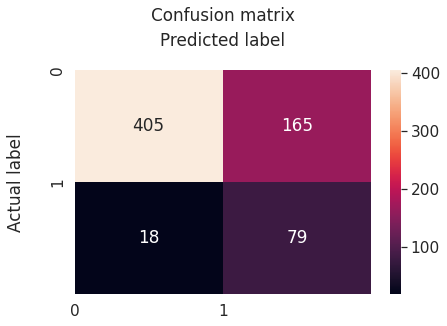

In [95]:
# Avaliar o modelo final com os dados de teste e criar a Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
print (cm)

pd.crosstab(y_test,pd.Series(y_pred), rownames=['ACTUAL'],colnames=['PRED'])

# Visualizar a Confision MAtrix
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [99]:
# Formatar o resultado final
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results["propensity_to_churn(%)"] = y_pred_probs
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)
final_results = final_results[['Unnamed: 0', 'churn', 'predictions', 'propensity_to_churn(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
final_results.sort_values("propensity_to_churn(%)", ascending = False)

,Unnamed: 0,churn,predictions,propensity_to_churn(%),Ranking
2076,2077,1,1,92.55,1
184,185,0,1,92.08,1
2164,2165,1,1,91.72,1
3,4,0,1,87.99,1
1533,1534,1,1,87.82,1
...,...,...,...,...,...
1352,1353,0,0,16.11,10
1397,1398,0,0,14.24,10
2269,2270,0,0,13.69,10
685,686,0,0,13.25,10
